# First tak

In [73]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [109]:

url = 'https://raw.githubusercontent.com/lihkirun/AppliedStatisticMS/main/DataVisualizationRPython/Lectures/Python/PythonDataSets/athlete_events.csv'
df = pd.read_csv(url)
print(df.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

Para este Dataset contamos con variables como :
+ Sex (Categorica)
+ Age (Continua)
+ Height (Continua)
+ Weight (Continua)
+ Team (Categorica)
+ Year (Discreta)
+ Season (Categorica)
+ City (Categorica)
+ Sport (Categorica)
+ Evento (Categorica)
+ Medal (Categorica)

In [160]:
df_2016 = df[df['Year'] == 2016]
df_medals_2016 = df_2016[df_2016['Medal'].notna()]
medal_count = df_medals_2016.groupby('Sport')['Medal'].count()
top_sports = medal_count.sort_values(ascending=False)
top_5sp = medal_count.sort_values(ascending=False).head(5)

df_top_sports = df_medals_2016[df_medals_2016['Sport'].isin(top_5sp.index)]
country_medals = df_top_sports.groupby('NOC')['Medal'].count().sort_values(ascending=False)

df_top_sports = df_top_sports.dropna(subset=['Weight'])
average_weight = df_top_sports.groupby('Sex')['Weight'].mean()
weight_by_medal = (df_medals_2016.groupby(['Medal'])['Weight']).apply(list)
height_by_medal= (df_medals_2016.groupby('Medal')['Height']).apply(list)



## Grafico para numero medallas concedidas a los 5 principales de deportes en 2016

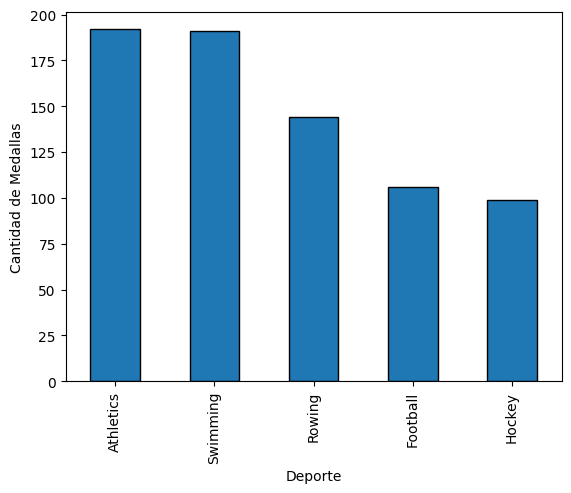

In [4]:

top_5sp.plot(kind='bar', edgecolor='black')
plt.xlabel('Deporte')
plt.ylabel('Cantidad de Medallas')
plt.show()


## Distribucion de la edad de los ganadores de medallas en los cinco principales deportes en 2016

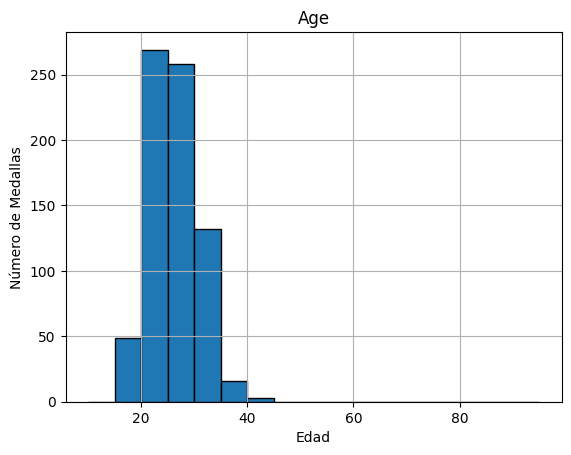

In [5]:
df_top_sports.hist(column='Age', bins=range(10, 100, 5), edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Número de Medallas')
plt.show()

## Cantidad total de medallas en los cinco principales deportes en 2016

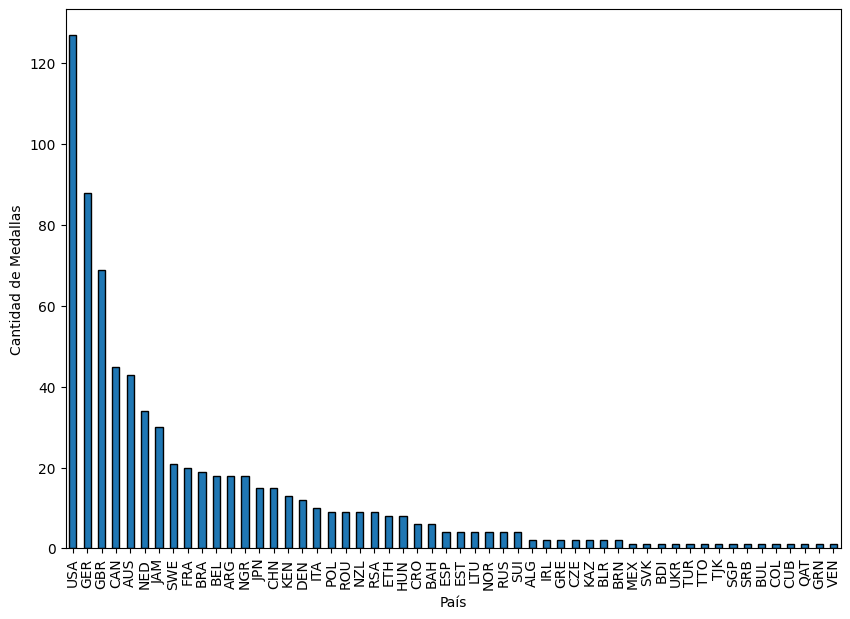

In [6]:
country_medals.plot(kind='bar', figsize=(10, 7), edgecolor='black')
plt.xlabel('País')
plt.ylabel('Cantidad de Medallas')
plt.show()

## Tendencia de la media del peso por sexo

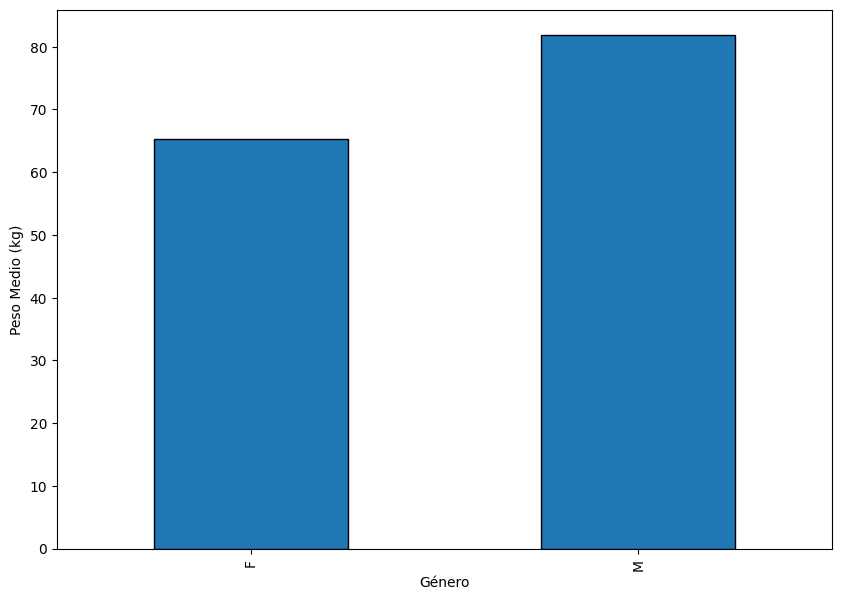

In [7]:
average_weight.plot(kind='bar', figsize=(10, 7), edgecolor='black')
plt.xlabel('Género')
plt.ylabel('Peso Medio (kg)')
plt.show()

## SEGUNDA PARTE

## Grafico de dispersion de Height y Weight

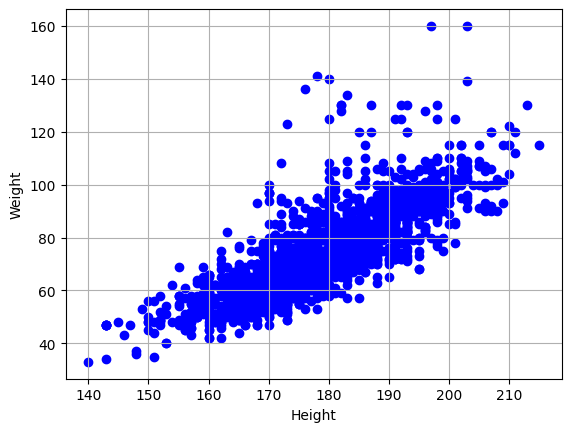

In [8]:
plt.scatter(df_medals_2016['Height'], df_medals_2016['Weight'],color = 'blue')
plt.xlabel('Height')
plt.ylabel('Weight')

plt.grid(True)
plt.show()

## Grafico de altura media por medalla

In [161]:
heights_by_medal = [np.array(height_by_medal.iloc[i][:100]) for i in range(3)]

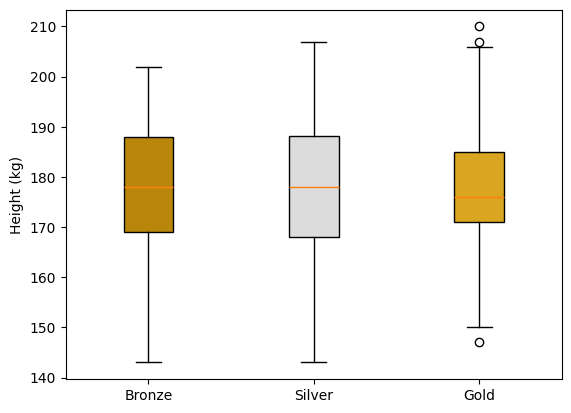

In [162]:
labels = ['Bronze', 'Silver', 'Gold']
colors = ['darkgoldenrod', '#DCDCDC', '#DAA520']

fig, ax = plt.subplots()
ax.set_ylabel('Height (kg)')

bplot = ax.boxplot(heights_by_medal,
                   patch_artist=True,  # fill with color
                   labels= labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

## Grafico de peso medio por medalla

In [135]:
weights_by_medal = [np.array((weight_by_medal.iloc[i][:100])) for i in range(3)]
weights_by_medal[-1][12] =70

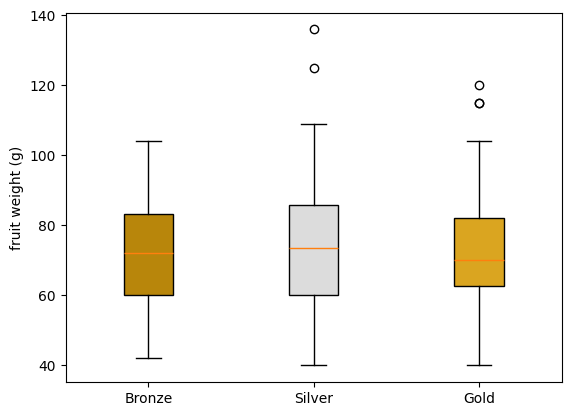

In [151]:
labels = ['Bronze', 'Silver', 'Gold']
colors = ['darkgoldenrod', '#DCDCDC', '#DAA520']

fig, ax = plt.subplots()
ax.set_ylabel('Weight (kg)')

bplot = ax.boxplot(weights_by_medal,
                   patch_artist=True,  # fill with color
                   labels= labels)  # will be used to label x-ticks

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()
